In [470]:
import sys
import streamlit as st
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [471]:
n = 47

In [472]:
path = f"./Humans/1 ({n}).jpg"
image = cv2.imread(path)
image = cv2.resize(image, (255, 255))

In [473]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [474]:
def detect(scale):
    eyes = eye_cascade.detectMultiScale(
    gray,
    scaleFactor=scale,
    minNeighbors=4,
    minSize=(15, 15) )
    # for (ex,ey,ew,eh) in eyes:
    #     cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    return eyes


In [475]:
scales = [1.05, 1.075, 1.1, 1.15, 1.2]
scale = 0
i = 0
eyes = []

In [476]:
while len(eyes) != 2 and i<5:
    eyes = detect(scales[i])
    i += 1

In [477]:

if len(eyes) != 2:
    print("Cound not find.")
else:
    eye1 = eyes[0]
    eye2 = eyes[1]
    x = min(eye1[0], eye2[0]) -5
    y = min(eye1[1], eye2[1]) 
    w = max(eye1[0]+eye1[2], eye2[0]+eye2[3]) +5
    h = max(eye1[1]+eye1[3], eye2[1]+eye2[3])
    # cv2.rectangle(image,(x, y),(w, h),(0,0,255),2)
    mask = np.zeros_like(image)
    mask[y:h, x:w] = image[y:h, x:w]

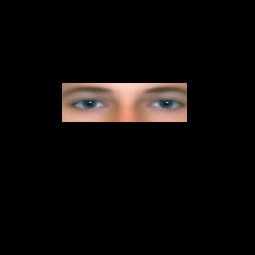

In [478]:
status = cv2.imwrite('output.jpg', mask)
Image.open("output.jpg")